## Supervised Learning Algorithms Part 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [3]:
# Define path
path = r'C:\Users\16307\Desktop\CareerFoundry\Tasks - Machine Learning\ClimateWins Analysis'

In [4]:
# Import data
df = pd.read_pickle(os.path.join(path, 'Data Sets', '[DATASET]_scaled2.pkl'))

In [5]:
df.head()

id      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0   0  19600101      1           0.660514          -0.02793        0.826097   
1   1  19600102      1           0.244897          -0.02793        0.735760   
2   2  19600103      1           1.076130          -0.02793        1.277781   
3   3  19600104      1          -1.001953          -0.02793        1.458455   
4   4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0         -0.179228  ...             -0.443701           0.761754   
1         -0.179228  ...              0.783085           1.183580   
2         -0.179228  ...              0.783085           1.183580   
3         -0.179228  ...              0.783085           0.480538   
4         -0.179228  ...             -1.670486          -0.363113   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0          -1.299744                  -0.806427               -0.088407   
1          -1.262455                  -1.042055                0.503361   
2          -0.432779                  -1.136306               -0.396127   
3           0.387574                  -1.183432                0.669056   
4           1.729970                  -0.794645               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max  
0          -0.519743          -0.752237  
1          -0.629054          -0.407141  
2           0.054135          -0.177078  
3          -0.164486          -0.838511  
4          -1.339569          -1.471186  

[5 rows x 171 columns]

In [6]:
# Import pleasant weather data
pleasantweather = pd.read_csv(os.path.join(path, 'Data Sets','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
pleasantweather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [8]:
# Only keep temperature variables (exclude Gdansk, Roma, and Tours weather stations)
subset_df = df[['DATE', 'MONTH',
 'BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']]

In [9]:
# Create an 'X' matrix by dropping the unneeded columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

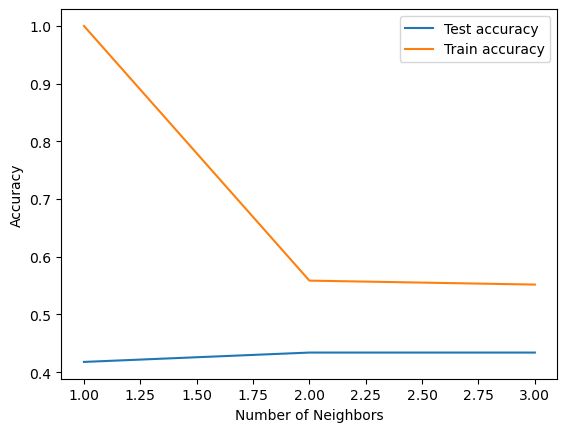

In [12]:
# Plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

### Test Set Confusion Matrix

In [14]:
# List of available locations (exclude the missing ones)
available_locations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 
                       'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Initialize plot
key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))  # 3x5 grid for 15 plots
labels = ['pleasant', 'unpleasant']  

count = 0
for i in range(3):
    for j in range(5):
        name = available_locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        # Plot each confusion matrix as a heatmap
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        count += 1

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('confusion_matrices_test.png', dpi=300)

C:\Users\16307\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### Training Set Confusion Matrix

C:\Users\16307\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


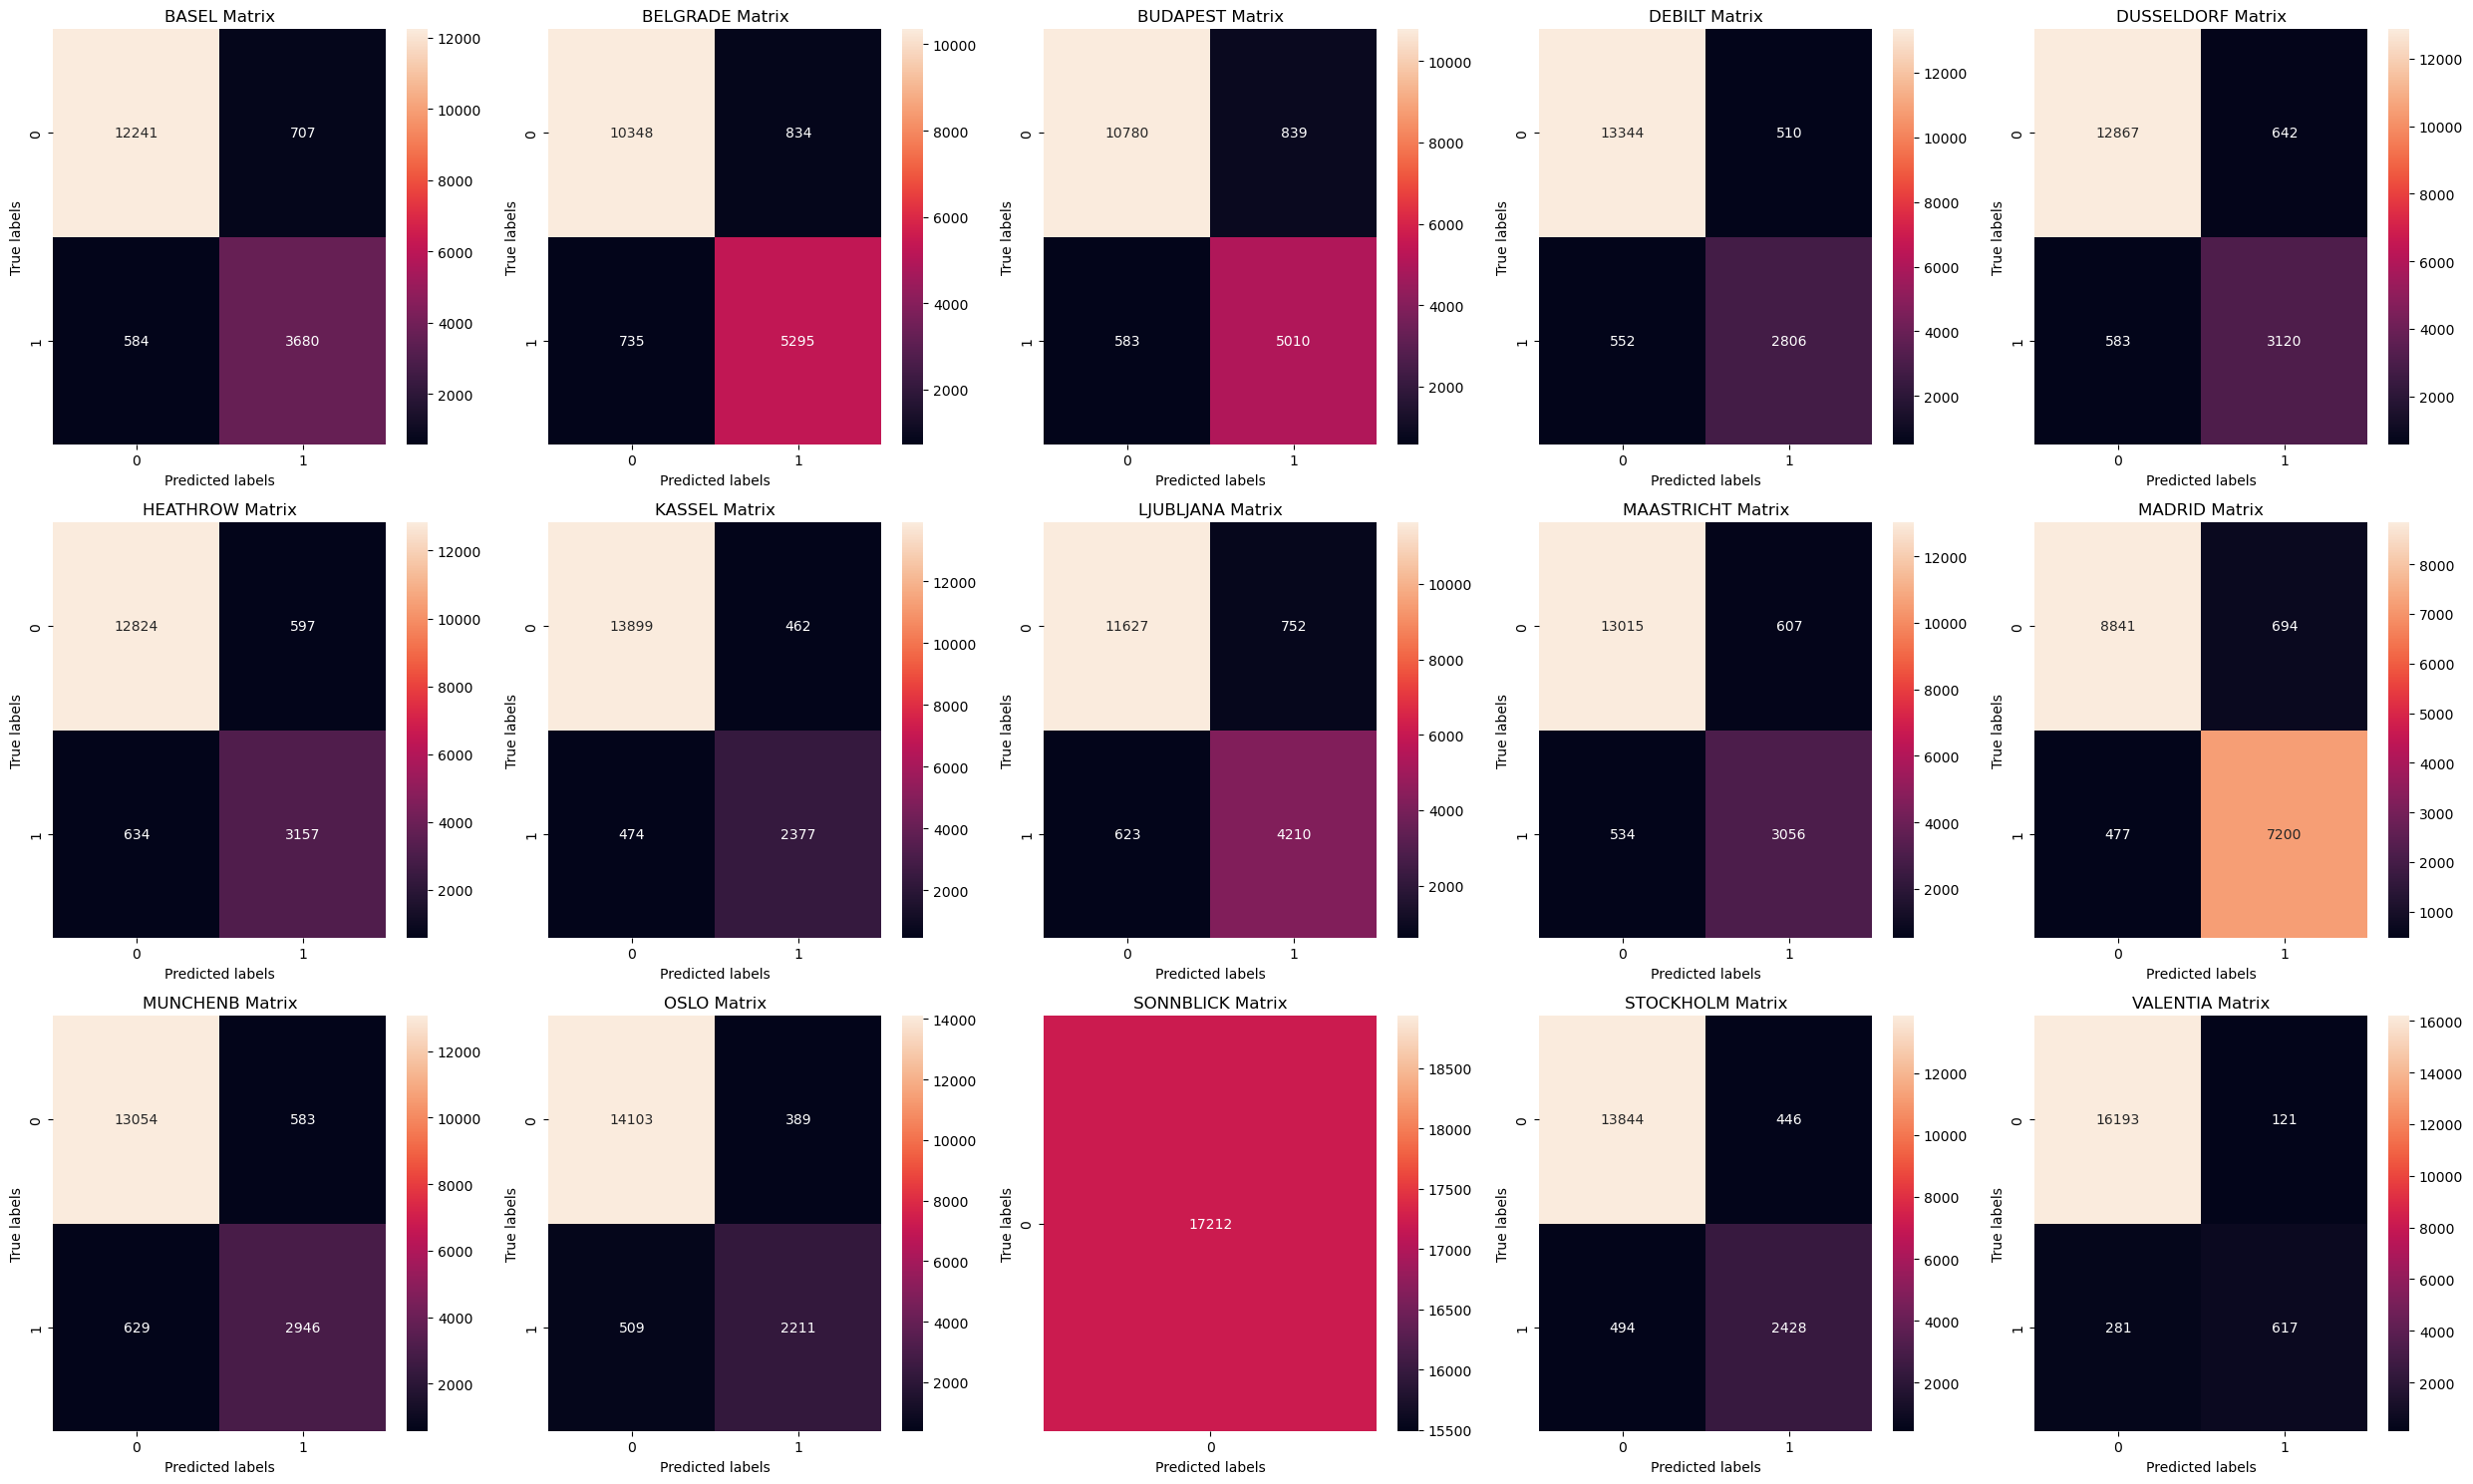

In [16]:
# List of available locations (exclude the missing ones)
available_locations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 
                       'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Initialize plot
key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))  # 3x5 grid for 15 plots
labels = ['pleasant', 'unpleasant']  

count = 0
for i in range(3):
    for j in range(5):
        name = available_locations[count]
        cm = confusion_matrix(y_train.loc[:, name + key], y_pred_train[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        # Plot each confusion matrix as a heatmap
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        count += 1

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('confusion_matrices_train.png', dpi=300)